In [1]:
import pandas as pd
data = pd.read_csv("TravelInsurancePrediction.csv")
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [2]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
data.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [5]:
data["TravelInsurance"] = data["TravelInsurance"].map({0: "Not Purchased", 1: "Purchased"})

In [6]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,Not Purchased
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,Not Purchased
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Purchased
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,Not Purchased
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,Not Purchased


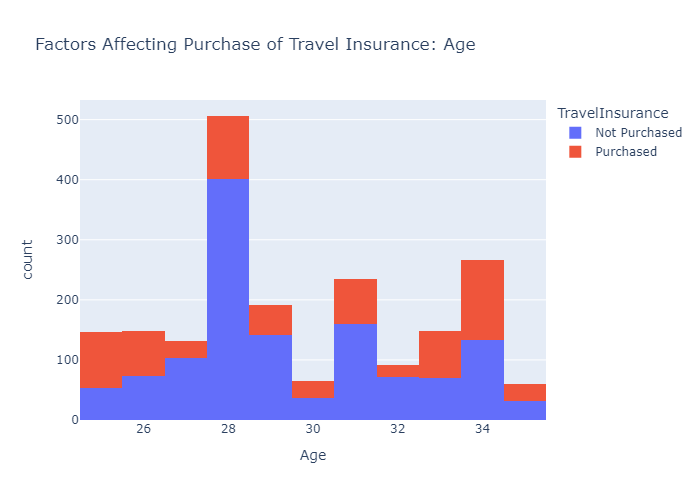

In [7]:
import kaleido
import plotly.express as px
data = data
figure = px.histogram(data, x = "Age", 
                      color = "TravelInsurance", 
                      title= "Factors Affecting Purchase of Travel Insurance: Age")
figure.show("png")

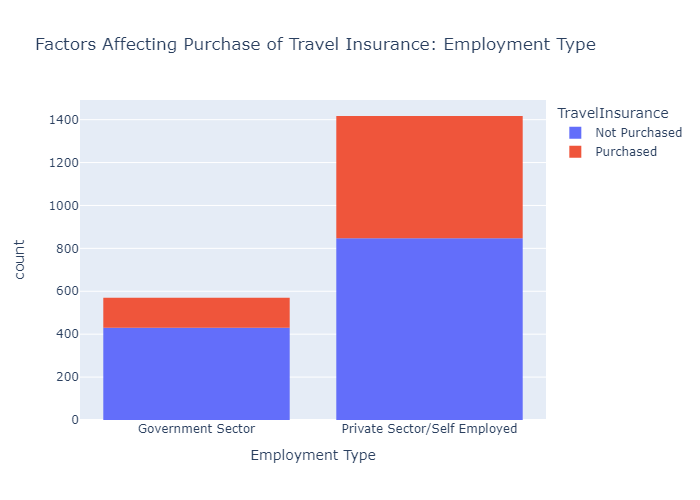

In [8]:

import plotly.express as px
data = data
figure = px.histogram(data, x = "Employment Type", 
                      color = "TravelInsurance", 
                      title= "Factors Affecting Purchase of Travel Insurance: Employment Type")
figure.show("png")

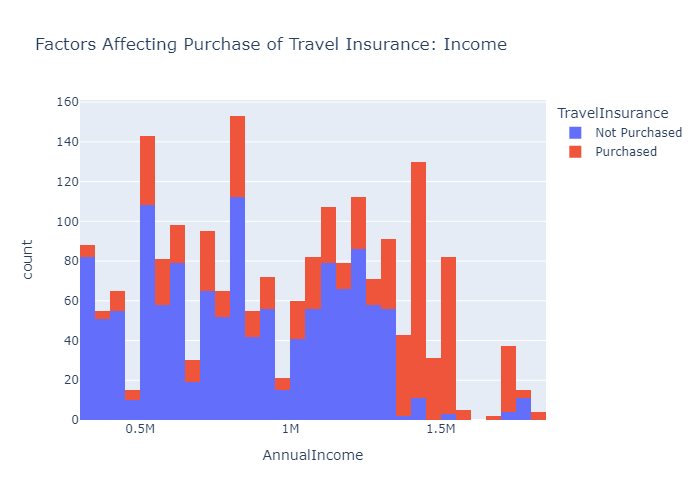

In [9]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "AnnualIncome", 
                      color = "TravelInsurance", 
                      title= "Factors Affecting Purchase of Travel Insurance: Income")
figure.show("png")

In [10]:
import numpy as np
data["GraduateOrNot"] = data["GraduateOrNot"].map({"No": 0, "Yes": 1})
data["FrequentFlyer"] = data["FrequentFlyer"].map({"No": 0, "Yes": 1})
data["EverTravelledAbroad"] = data["EverTravelledAbroad"].map({"No": 0, "Yes": 1})
x = np.array(data[["Age", "GraduateOrNot", 
                   "AnnualIncome", "FamilyMembers", 
                   "ChronicDiseases", "FrequentFlyer", 
                   "EverTravelledAbroad"]])
y = np.array(data[["TravelInsurance"]])

In [14]:
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8140703517587939


In [15]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,Not Purchased
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,Not Purchased
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,Purchased
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,Not Purchased
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,Not Purchased


In [16]:
# prediction
#features = [Age, GraduateOrNot, AnnualIncome, FamilyMembers, ChronicDiseases, FrequentFlyer, EverTravelledAbroad]
features = np.array([[28, 1, 700000, 8, 1, 1, 0]])
print(model.predict(features))

['Not Purchased']
